<a href="https://colab.research.google.com/github/code-with-sachin/deep_learning_project_ML_Potato_Plant_disease_identification/blob/main/Project_PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [14]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
data_directory_path = '/content/drive/MyDrive/My_Projects/Datasets/Plant_Disease/PlantVillage'
EPOCHS = 50

In [15]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [16]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory_path , shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [17]:
!nvidia-smi

Sun Jan 30 12:02:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    27W /  70W |    394MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [19]:
len(dataset)

68

In [20]:
for image_batch, label_batch in dataset.take(1):
  #print(image_batch.shape)
  #print(label_batch.numpy())  #every element(label_batch) you get is a tensor, so using .numpy we convert it to numpy array
  #print first image
  print(image_batch[0])  #--> it's a tensor
  print(image_batch[0].shape)
  print(image_batch[0].numpy())  #--> tensor converted to numpy, prints 3D array and every number is btw 0 to 255 that is color RGB

tf.Tensor(
[[[137. 140. 159.]
  [139. 142. 159.]
  [141. 144. 159.]
  ...
  [121. 118. 127.]
  [143. 140. 149.]
  [137. 134. 143.]]

 [[146. 149. 166.]
  [144. 147. 162.]
  [142. 146. 158.]
  ...
  [122. 119. 128.]
  [133. 130. 139.]
  [131. 128. 137.]]

 [[149. 153. 164.]
  [143. 147. 158.]
  [140. 143. 152.]
  ...
  [134. 131. 140.]
  [130. 127. 136.]
  [136. 133. 142.]]

 ...

 [[189. 191. 203.]
  [186. 188. 200.]
  [187. 189. 201.]
  ...
  [172. 170. 181.]
  [172. 170. 181.]
  [176. 174. 185.]]

 [[188. 190. 202.]
  [188. 190. 202.]
  [192. 194. 206.]
  ...
  [170. 168. 179.]
  [173. 171. 182.]
  [179. 177. 188.]]

 [[183. 185. 197.]
  [188. 190. 202.]
  [195. 197. 209.]
  ...
  [170. 168. 179.]
  [174. 172. 183.]
  [181. 179. 190.]]], shape=(256, 256, 3), dtype=float32)
(256, 256, 3)
[[[137. 140. 159.]
  [139. 142. 159.]
  [141. 144. 159.]
  ...
  [121. 118. 127.]
  [143. 140. 149.]
  [137. 134. 143.]]

 [[146. 149. 166.]
  [144. 147. 162.]
  [142. 146. 158.]
  ...
  [122. 119. 12

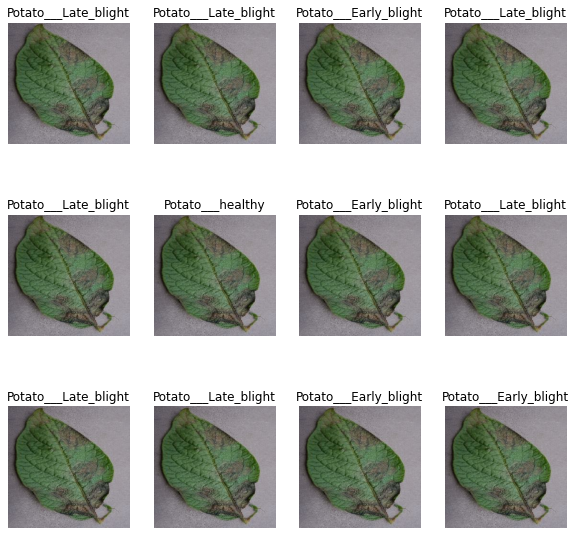

In [21]:
plt.figure(figsize=(10, 10))  #If we dont include this line the images will get messed up, so we increase the dimension as 10 by 10
#plt.imshow() #this is matplotlib , and imshow() it expects 3D array
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[0].numpy().astype("uint8")) #So we are printing fisrt array
    plt.title(class_names[label_batch[i]])
    plt.axis("off") #hides axises printing

We will split the dataset by train test split. (So in sklearn we have train_test_split method, when we use statistical machine learning in Sklearn)

I have kept 80% data as training data

20% remaining as : 10% --> validation, 10% --> test



In [22]:
train_size = 0.8 # beacuse training data we have taken 80% . ie. 0.8/1.0
len(dataset)*train_size

54.400000000000006

In [24]:
train_ds = dataset.take(54) # Since 80% is first 54.4 So it will return same
len(train_ds)

54

In [25]:
rem_ds = dataset.skip(54) # it means we are skipping first 54 and you are remaining 54, It is similar to slicing operation in Python list ex. arr[54:]
len(rem_ds) #rem_ds is just variable signifying remaining 20% dataset which we will split as validation and test data set

14

In [26]:
val_size = 0.1  # val_size is a variable signifying validation data size
len(dataset)*val_size

6.800000000000001

In [27]:
val_ds = rem_ds.take(6)
len(val_ds)  # val_ds signifies validation dataset variable

6

In [29]:
test_ds = rem_ds.skip(6)
len(test_ds)

8

In [30]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle = True, shuffle_size = 10000):

  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed = 12)   #seed is for prediction
  
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [31]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [32]:
len(train_ds)

54

In [33]:
len(val_ds)

6

In [34]:
len(test_ds)

8

In [36]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

Till now, above now all my 3 datasets are kind of optimized for training performance.
So my training will run fast.

Now we will do some pre processing, similar to any image processing, the first thing we do is scale, so the numpy array we saw previously is between 0 to 255, you know it's an RGB scale

So we will divide that by 255, so that we get a number between 0 and 1.

So the way we do that is as below :

In [37]:
resize_and_rescale = tf.keras.Sequential([
                     layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
                     layers.experimental.preprocessing.Rescaling(1.0/255)                     
]) # we are supplying our pre processing pipleline in the brackets, so it will resize and rescale the size of image which is not 256 by 256

In [38]:
data_augmentation = tf.keras.Sequential([
                     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                     layers.experimental.preprocessing.RandomRotation(0.2)                     
])

So till now we did many thing and last we did preprocessing above. which we will use on our dataset now

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE)
model = models.Sequential([
                           resize_and_rescale,
                           data_augmentation,
                           layers.conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
                           layers.Maxpooling2D((2,2)),
])